# McDonald's Menu Analysis

Author: Jenny Tran

Course Project, UC Irvine, Math 10, W22

## Introduction

McDonald's is one of the most popular fast food chains across the United States known for their affordable and unhealthy foods and beverages. We will use the McDonald's Nutrition Facts dataset to find which food item and category appears to be most healthy and unhealthy.

We will define healthy foods as something with the most proteins, least calories, and etc. We will define unhealthy foods as items with the most sugar, calories, least proteins, and etc. 

## Main portion of the project


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import plotly.express as px
import plotly.offline as py
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss

### Import the Data

In [4]:
df = pd.read_csv("menu.csv")
df

Category                                               Item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        Serving Size  Calories  Calories from Fat  Total Fat  \
0     4.8 oz (136 g)       300                120       13.0   
1     4.8 oz (135 g)       250                 70        8.0   
2     3.9 oz (111 g)       370                200       23.0   
3     5.7 oz (161 g)       450                250       28.0   
4     5.7 oz (161 g)       400                210       23.0   
..               ...       ...                ...        ...   
255  10.1 oz (285 g)       510                150       17.0   
256  13.4 oz (381 g)       690                200       23.0   
257   6.7 oz (190 g)       340                100       11.0   
258  14.2 oz (403 g)       810                290       32.0   
259   7.1 oz (202 g)       410                150       16.0   

     Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
0                           20            5.0                             25   
1                           12            3.0                             15   
2                           35            8.0                             42   
3                           43           10.0                             52   
4                           35            8.0                             42   
..                         ...            ...                            ...   
255                         26            9.0                             44   
256                         35           12.0                             58   
257                         17            6.0                             29   
258                         50           15.0                             76   
259                         25            8.0                             38   

     Trans Fat  ...  Carbohydrates  Carbohydrates (% Daily Value)  \
0          0.0  ...             31                             10   
1          0.0  ...             30                             10   
2          0.0  ...             29                             10   
3          0.0  ...             30                             10   
4          0.0  ...             30                             10   
..         ...  ...            ...                            ...   
255        0.5  ...             80                             27   
256        1.0  ...            106                             35   
257        0.0  ...             53                             18   
258        1.0  ...            114                             38   
259        0.0  ...             57                             19   

     Dietary Fiber  Dietary Fiber (% Daily Value)  Sugars  Protein  \
0                4                             17       3       17   
1                4                             17       3       18   
2                4                             17       2       14   
3                4                             17       2       21   
4                4                             17       2       21   
..             ...                            ...     ...      ...   
255              1           

In [5]:
df['Category'].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [6]:
print(f"Coffee & Tea has the most items with a total of {(df['Category'] == 'Coffee & Tea').sum()}")

Coffee & Tea has the most items with a total of 95


### KNeighborsClassifier

Use KNeighborClassifier to predict the Category using Calories and Sodium.



In [7]:
clf = KNeighborsClassifier(n_neighbors=4)

In [8]:
X = df[["Calories", "Sodium"]]
y = df['Category']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [10]:
clf.fit(X_test,y_test)

KNeighborsClassifier(n_neighbors=4)

In [11]:
df['Prediction'] = clf.predict(X)

### Altair

Use Altair to plot.

In [12]:
c1 = alt.Chart(df).mark_circle().encode(
    x = "Sodium",
    y = "Calories",
    color = 'Category',
    tooltip = 'Item'
)

In [13]:
c2 = alt.Chart(df).mark_circle().encode(
        x = "Sodium",
        y = "Calories",
        color = 'Prediction',
        tooltip = 'Item'
    )

In [14]:
c1 | c2

alt.HConcatChart(...)

The 1st graph shows the actual scatterplot and the 2nd graph shows the predicted scatterplot. There is a lot more Breakfast foods that are shown in the predicted scatterplot. In both scatterplots, it looks like we have a positive correlation between Sodium and Calories. We can also see that the drinks and beverages have the least sodium.

Next, we will find the number of neighbors (k) that will give us the best fit graph.

In [15]:
for k in range(10,50):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    loss = log_loss(y_test, clf.predict_proba(X_test))
    print(k)
    print(loss)

10
3.3120738960940423
11
3.097198769819272
12
2.8921496270330396
13
2.901655283064176
14
2.2934615215939638
15
2.303168029898779
16
2.31457644369687
17
2.3282185367836825
18
2.328052254278475
19
2.340009135159213
20
2.142756164151032
21
1.9468874856039895
22
1.940569861791783
23
1.742740277377538
24
1.7482270386068899
25
1.7578548376770478
26
1.7581303091387004
27
1.7656781842106335
28
1.7694041997904968
29
1.5820999079470608
30
1.594377309250326
31
1.6011036914647103
32
1.6121611682957064
33
1.6228389634423437
34
1.6386336728933297
35
1.6504111525039924
36
1.6558699120306624
37
1.6631468941999572
38
1.6721948474042325
39
1.6843839877483247
40
1.6916566327585547
41
1.4990591506581366
42
1.5111139169286842
43
1.5241539302123701
44
1.535250593641166
45
1.5451405212684357
46
1.557352058251086
47
1.5662835247323774
48
1.5776393206201005
49
1.3904371313084163


The log_loss is the smallest when k=45. This means we will have the best fitted graph when we set n_neighbors equal to 45. (This number may change if we run the notebook multiple times. The ideal k number should be between 35-50.)

### Plotly
Create a bar chart using Plotly. This bar chart will show us the food category and the amount of average proteins and sugars each category has. 

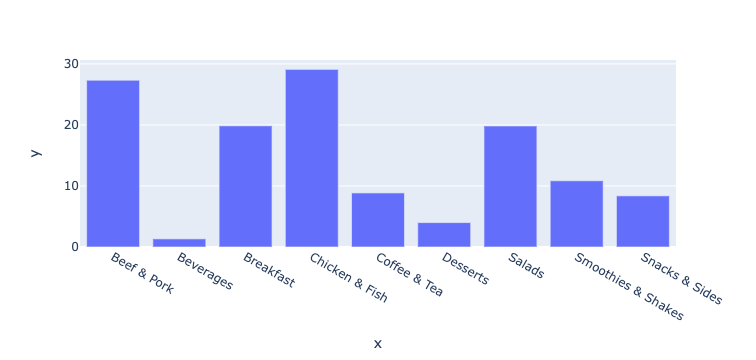

In [16]:
avgprotein = pd.DataFrame(df.groupby('Category')['Protein'].mean())

fig = px.bar(df, x=avgprotein.index, y=avgprotein["Protein"])
fig.show()

Chicken &amp; Fish has the most average protein. Lets find what food item in this category has the most protein.

In [17]:
chifi = df[df['Category'] == 'Chicken & Fish']
chifi = chifi[['Item', 'Protein']]
chifi.sort_values(by=['Protein'], ascending=False)


Item  Protein
82                       Chicken McNuggets (40 piece)       87
81                       Chicken McNuggets (20 piece)       44
60              Premium Grilled Chicken Club Sandwich       40
64           Bacon Clubhouse Grilled Chicken Sandwich       40
59               Premium Crispy Chicken Club Sandwich       36
62         Premium Grilled Chicken Ranch BLT Sandwich       36
63            Bacon Clubhouse Crispy Chicken Sandwich       36
71   Premium McWrap Chicken & Bacon (Grilled Chicken)       36
70    Premium McWrap Chicken & Bacon (Crispy Chicken)       32
61          Premium Crispy Chicken Ranch BLT Sandwich       32
75  Premium McWrap Southwest Chicken (Grilled Chic...       31
73   Premium McWrap Chicken & Ranch (Grilled Chicken)       30
58           Premium Grilled Chicken Classic Sandwich       28
77  Premium McWrap Chicken Sweet Chili (Grilled Ch...       27
74  Premium McWrap Southwest Chicken (Crispy Chicken)       27
72    Premium McWrap Chicken & Ranch (Crispy Chicken)       27
57            Premium Crispy Chicken Classic Sandwich       24
76  Premium McWrap Chicken Sweet Chili (Crispy Chi...       23
67                            Bacon Cheddar McChicken       22
80                       Chicken McNuggets (10 piece)       22
65             Southern Style Crispy Chicken Sandwich       21
68                      Bacon Buffalo Ranch McChicken       20
83                                       Filet-O-Fish       15
69                            Buffalo Ranch McChicken       14
66                                          McChicken       14
79                        Chicken McNuggets (6 piece)       13
78                        Chicken McNuggets (4 piece)        9

The Chicken McNuggets (40 Pieces) have the most protein followed by the Chicken McNuggets (20 Pieces).

Next, we will check the average sugar of each category.

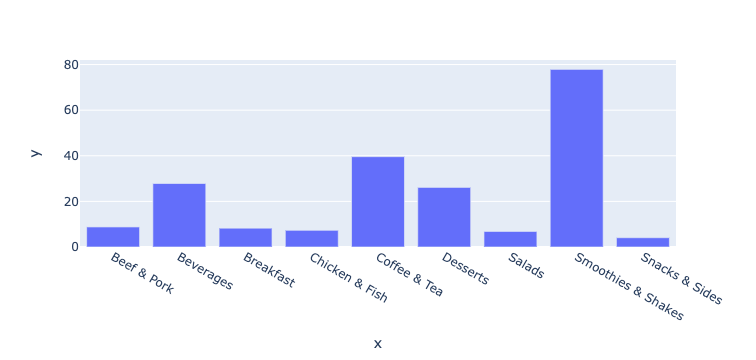

In [18]:
avgsugar = pd.DataFrame(df.groupby('Category')['Sugars'].mean())

fig = px.bar(df, x=avgsugar.index, y=avgsugar["Sugars"])
fig.show()

Smoothies &amp; Shakes has the most average sugar. Lets find what item has the most sugar in this category.

In [19]:
smsh = df[df['Category'] == 'Smoothies & Shakes']
smsh = smsh[['Item', 'Sugars']]
smsh.sort_values(by=['Sugars'], ascending=False)


Item  Sugars
253               McFlurry with M&M’s Candies (Medium)     128
246                           Strawberry Shake (Large)     123
249                            Chocolate Shake (Large)     120
251                             Shamrock Shake (Large)     115
258  McFlurry with Reese's Peanut Butter Cups (Medium)     103
243                              Vanilla Shake (Large)     101
245                          Strawberry Shake (Medium)     100
248                           Chocolate Shake (Medium)      97
250                            Shamrock Shake (Medium)      93
252                McFlurry with M&M’s Candies (Small)      89
256                McFlurry with Oreo Cookies (Medium)      85
242                             Vanilla Shake (Medium)      81
244                           Strawberry Shake (Small)      79
247                            Chocolate Shake (Small)      77
240                   Mango Pineapple Smoothie (Large)      72
234             Blueberry Pomegranate Smoothie (Large)      70
237                 Strawberry Banana Smoothie (Large)      70
255                 McFlurry with Oreo Cookies (Small)      64
241                              Vanilla Shake (Small)      63
254                McFlurry with M&M’s Candies (Snack)      59
239                  Mango Pineapple Smoothie (Medium)      56
236                Strawberry Banana Smoothie (Medium)      54
233            Blueberry Pomegranate Smoothie (Medium)      54
259   McFlurry with Reese's Peanut Butter Cups (Snack)      51
238                   Mango Pineapple Smoothie (Small)      46
235                 Strawberry Banana Smoothie (Small)      44
232             Blueberry Pomegranate Smoothie (Small)      44
257                 McFlurry with Oreo Cookies (Snack)      43

The McFlurry with M&amp;M's Candies (Medium) has the most sugar.

Next, we will find which category has the most total fats.

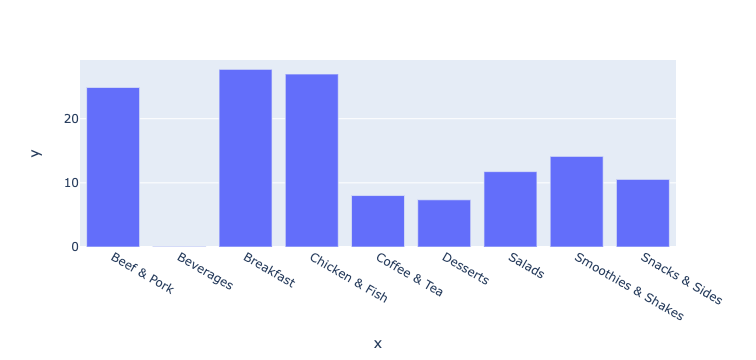

In [20]:
avgfat = pd.DataFrame(df.groupby('Category')['Total Fat'].mean())

fig = px.bar(df, x=avgfat.index, y=avgfat["Total Fat"])
fig.show()

The Beef &amp; Pork, Breakfast, and Chicken &amp; Fish categories contain the most average total fat.

### Correlation between Nutrients (Vitamins, Iron, Fat, etc.)

In [21]:
dailyper = df[['Vitamin A (% Daily Value)','Vitamin C (% Daily Value)','Calcium (% Daily Value)',
      'Iron (% Daily Value)','Total Fat (% Daily Value)',
      'Cholesterol (% Daily Value)','Carbohydrates (% Daily Value)']]

dailyper.corr()


Vitamin A (% Daily Value)  \
Vitamin A (% Daily Value)                       1.000000   
Vitamin C (% Daily Value)                       0.069171   
Calcium (% Daily Value)                         0.179190   
Iron (% Daily Value)                            0.137879   
Total Fat (% Daily Value)                       0.054038   
Cholesterol (% Daily Value)                     0.080059   
Carbohydrates (% Daily Value)                   0.083376   

                               Vitamin C (% Daily Value)  \
Vitamin A (% Daily Value)                       0.069171   
Vitamin C (% Daily Value)                       1.000000   
Calcium (% Daily Value)                        -0.215380   
Iron (% Daily Value)                            0.001292   
Total Fat (% Daily Value)                      -0.089353   
Cholesterol (% Daily Value)                    -0.083315   
Carbohydrates (% Daily Value)                  -0.035450   

                               Calcium (% Daily Value)  Iron (% Daily Value)  \
Vitamin A (% Daily Value)                     0.179190              0.137879   
Vitamin C (% Daily Value)                    -0.215380              0.001292   
Calcium (% Daily Value)                       1.000000              0.034149   
Iron (% Daily Value)                          0.034149              1.000000   
Total Fat (% Daily Value)                     0.162031              0.735478   
Cholesterol (% Daily Value)                   0.132382              0.653167   
Carbohydrates (% Daily Value)                 0.590263              0.210643   

                               Total Fat (% Daily Value)  \
Vitamin A (% Daily Value)                       0.054038   
Vitamin C (% Daily Value)                      -0.089353   
Calcium (% Daily Value)                         0.162031   
Iron (% Daily Value)                            0.735478   
Total Fat (% Daily Value)                       1.000000   
Cholesterol (% Daily Value)                     0.680378   
Carbohydrates (% Daily Value)                   0.460298   

                               Cholesterol (% Daily Value)  \
Vitamin A (% Daily Value)                         0.080059   
Vitamin C (% Daily Value)                        -0.083315   
Calcium (% Daily Value)                           0.132382   
Iron (% Daily Value)                              0.653167   
Total Fat (% Daily Value)                         0.680378   
Cholesterol (% Daily Value)                       1.000000   
Carbohydrates (% Daily Value)                     0.270992   

                               Carbohydrates (% Daily Value)  
Vitamin A (% Daily Value)                           0.083376  
Vitamin C (% Daily Value)                          -0.035450  
Calcium (% Daily Value)                             0.590263  
Iron (% Daily Value)                                0.210643  
Total Fat (% Daily Value)                           0.460298  
Cholesterol (% Daily Value)                         0.270992  
Carbohydrates (% Daily Value)                       1.000000

From this we can see that Cholesterol and Iron is positively correlated with Total Fat (meaning the more Cholesterol and Iron, the more Total Fat we have). Ideally, we want foods with less Cholesterol and Total Fat, and more Iron. Instead, we may want to choose foods with high Carbohydrates as they are next to be positively correlated with Iron after Total Fat and Cholesterol.

### Salads

Salads are known to be very healthy. Lets find which salad contains the most dietary fibers.

In [22]:
salads = df[df['Category']=='Salads']
salads

Category                                            Item     Serving Size  \
84   Salads     Premium Bacon Ranch Salad (without Chicken)   7.9 oz (223 g)   
85   Salads   Premium Bacon Ranch Salad with Crispy Chicken     9 oz (255 g)   
86   Salads  Premium Bacon Ranch Salad with Grilled Chicken   8.5 oz (241 g)   
87   Salads       Premium Southwest Salad (without Chicken)   8.1 oz (230 g)   
88   Salads     Premium Southwest Salad with Crispy Chicken  12.3 oz (348 g)   
89   Salads    Premium Southwest Salad with Grilled Chicken  11.8 oz (335 g)   

    Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  \
84       140                 70        7.0                         11   
85       380                190       21.0                         33   
86       220                 80        8.0                         13   
87       140                 40        4.5                          7   
88       450                190       22.0                         33   
89       290                 80        8.0                         13   

    Saturated Fat  Saturated Fat (% Daily Value)  Trans Fat  ...  \
84            3.5                             18        0.0  ...   
85            6.0                             29        0.0  ...   
86            4.0                             20        0.0  ...   
87            2.0                              9        0.0  ...   
88            4.5                             22        0.0  ...   
89            2.5                             13        0.0  ...   

    Carbohydrates (% Daily Value)  Dietary Fiber  \
84                              3              3   
85                              7              2   
86                              3              2   
87                              7              6   
88                             14              7   
89                              9              7   

    Dietary Fiber (% Daily Value)  Sugars  Protein  Vitamin A (% Daily Value)  \
84                             12       4        9                        170   
85                             10       5       25                        100   
86                             10       4       29                        110   
87                             23       6        6                        160   
88                             28      12       23                        170   
89                             28      10       27                        170   

    Vitamin C (% Daily Value)  Calcium (% Daily Value)  Iron (% Daily Value)  \
84                         30                       15                     6   
85                         25                       15                     8   
86                         30                       15                     8   
87                         25                       15                    10   
88                         30                       15                    15   
89                         30                       15                    15   

        Prediction  
84    Coffee & Tea  
85  Chicken & Fish  
86  Snacks & Sides  
87       Beverages  
88  Chicken & Fish  
89  Snacks & Sides  

[6 rows x 25 columns]

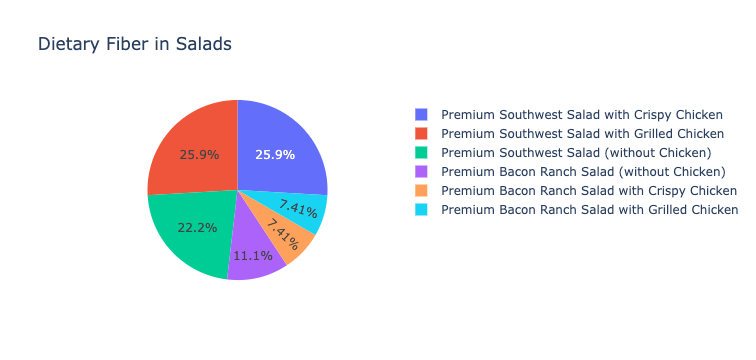

In [23]:
fig = px.pie(salads, values='Dietary Fiber', names='Item',
             title='Dietary Fiber in Salads',)
fig.show()

The Southwest Salad overall has the most dietary fibers with the highest being the Premium Southwest Salad with Crispy Chicken.

## Summary


There are multiple ways to interpret the results depending what diet someone chooses to use. For a high protein diet, it's best to choose food items within the Chicken &amp; Fish Category. For a low calorie diet, it's best to avoid foods with high sodium since they positively correlate with calories. This includes items within the Breakfast and Chicken &amp; Fish Categories. Overall, Smoothies &amp; Shakes should be avoided as they contain an overwhelming amount of sugar compared to the other categories. It's hard to find foods with high protein and iron with low total fat, cholesterol, and sodium. The Premium Southwest Salad is probably the best item to choose for an overall healthy diet. Salads, overall, didn't contain a lot of sugar and fat and had a good amount of protein, and this salad in particular had a lot of dietary fibers. 

## References

Where the Dataset was found: https://www.kaggle.com/mcdonalds/nutrition-facts

Insightful References: 

https://www.kaggle.com/vaishnavipatil4848/insights-nutritional-facts-in-mcdonald-s-menu

https://plotly.com/python/pie-charts/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bd4244e8-6f61-43b0-80ec-abb92d8a6c91' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>